Проблема кредитного скоринга является важной составляющей процесса кредитования в банковской сфере. На основе результатов моделей кредитного скоринга, среди прочего, рассчитывается средний уровень вероятности дефолта (Probability of Default — PD). Дефолт возникает, когда заемщик прекращает вносить необходимые платежи по долгу. Это может подвергнуть заемщика судебным искам и ограничить доступ к кредитам в будущем.

# 1. Загрузка библиотек и датасета


In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.datasets import fetch_openml

In [159]:
# Читаем данные из файла csv с заданием колонки ID в качестве индексной
df = pd.read_csv("UCI_Credit_Card.csv", index_col='ID')

In [160]:
# Переименовываем колонку таргета для удобства
df.rename(columns={"default.payment.next.month": "default"}, inplace = True)

In [161]:
# Первично просматриваем данные
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [162]:
# Выводим информацию о колонках в датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

## 2. Отображение соотношения между объектами из разных классов по тергетному значению

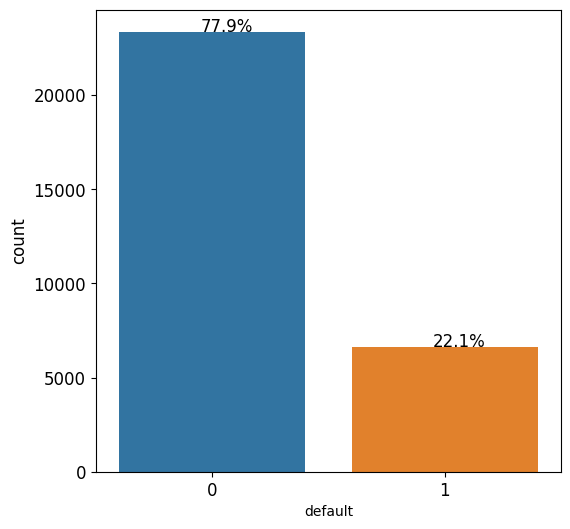

In [163]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

plt.figure(figsize = (6,6))
ax = sns.countplot(x = df['default'])
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

without_hue(ax, df.default)

## 3. Отображение количества объектов из разных классов по значению кат. признаков

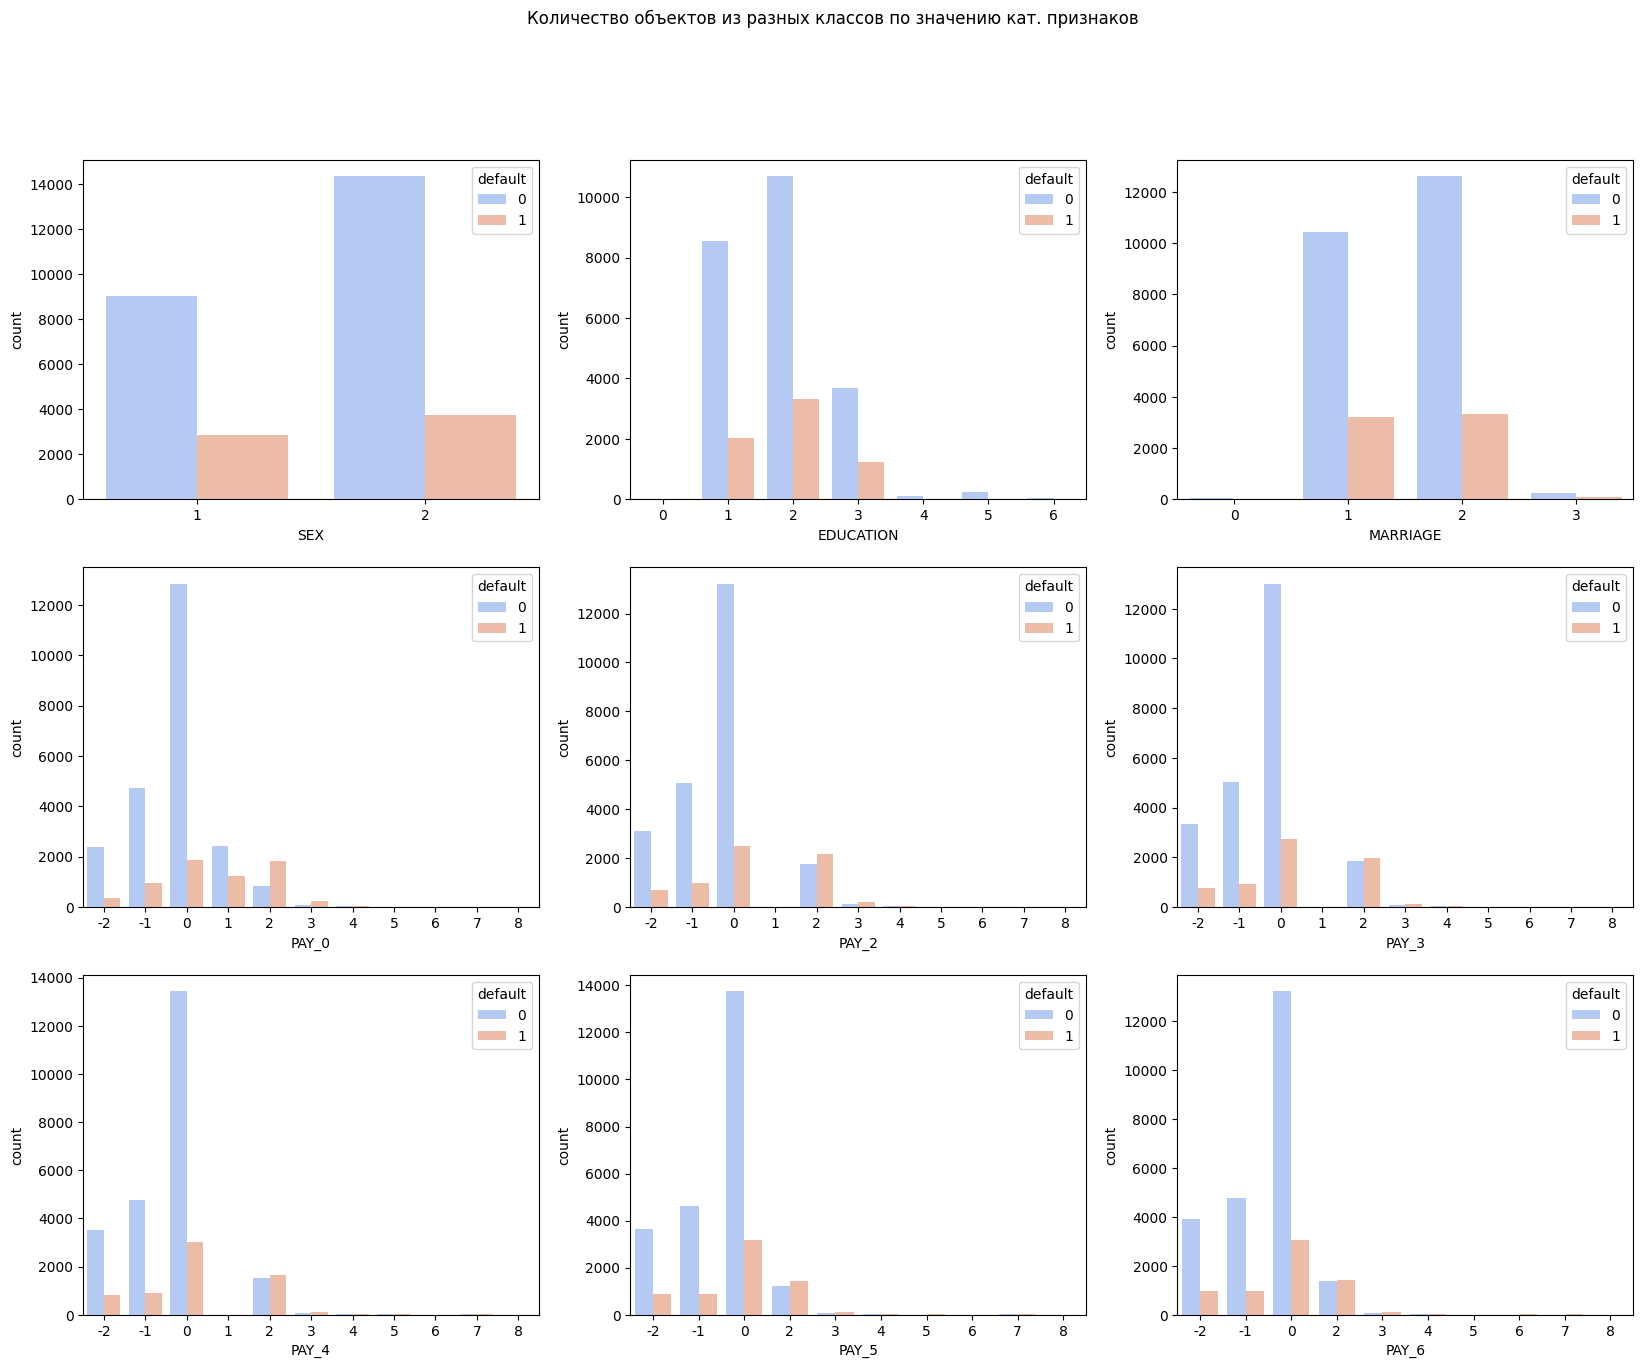

In [164]:
subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default']]
f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('Количество объектов из разных классов по значению кат. признаков')
ax1 = sns.countplot(x="SEX", hue="default", data=subset, palette="coolwarm", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default", data=subset, palette="coolwarm",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default", data=subset, palette="coolwarm",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="default", data=subset, palette="coolwarm", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default", data=subset, palette="coolwarm", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default", data=subset, palette="coolwarm", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default", data=subset, palette="coolwarm", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default", data=subset, palette="coolwarm", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default", data=subset, palette="coolwarm", ax=axes[2,2])

## Изменим количество месяцев в задержке платежа

Если количество месяцев больше 4, то это будет категория 5 (задержка больше 4 месяцев)

In [165]:
column_list = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',]
df[column_list] = df[column_list].apply(lambda x: x.apply(lambda y: 5 if y > 4 else y))

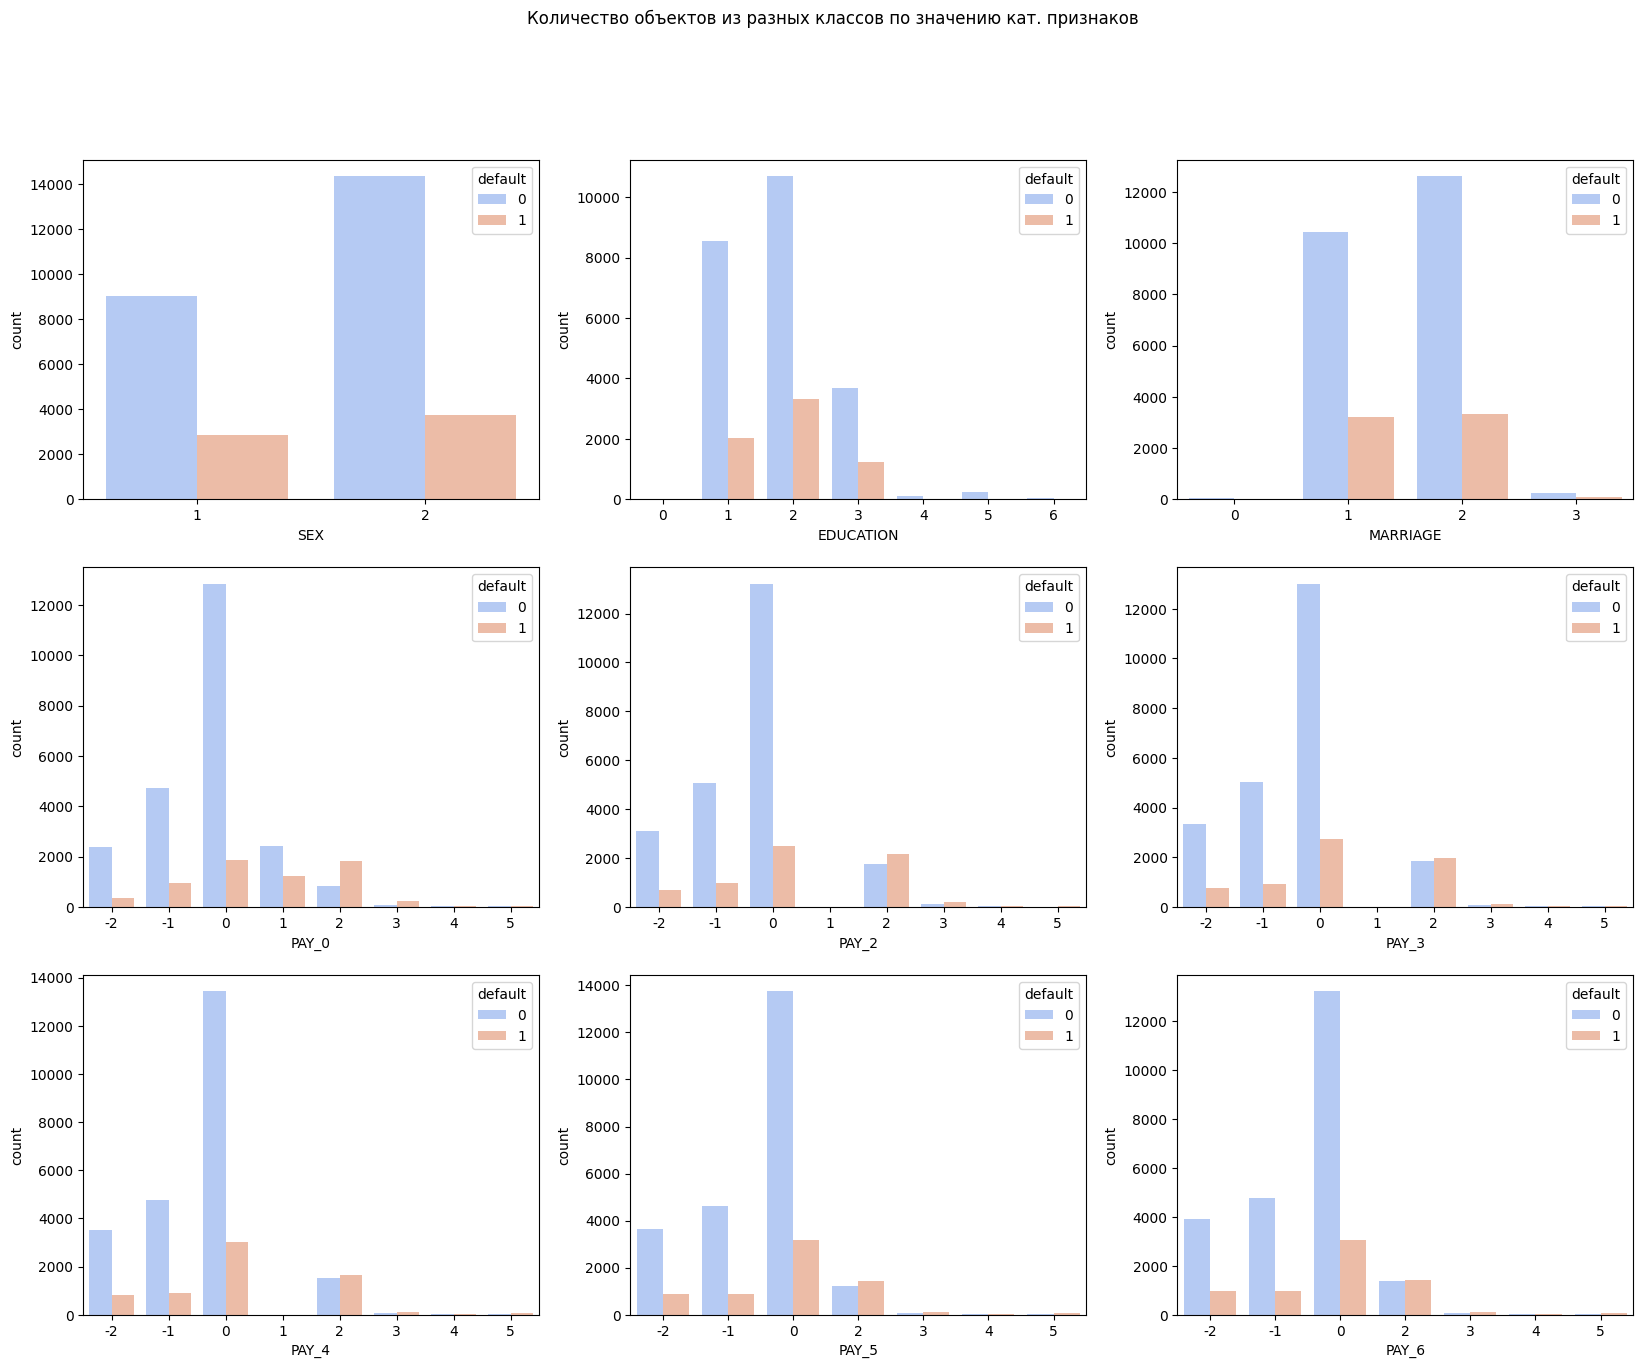

In [166]:
subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default']]
f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('Количество объектов из разных классов по значению кат. признаков')
ax1 = sns.countplot(x="SEX", hue="default", data=subset, palette="coolwarm", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default", data=subset, palette="coolwarm",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default", data=subset, palette="coolwarm",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="default", data=subset, palette="coolwarm", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default", data=subset, palette="coolwarm", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default", data=subset, palette="coolwarm", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default", data=subset, palette="coolwarm", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default", data=subset, palette="coolwarm", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default", data=subset, palette="coolwarm", ax=axes[2,2])

## 4. One-Hot Encoding

In [167]:
# Преобразовываем категориальные колонки в удобный формат для модели решающего дерева
cat_feature = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df_dum = pd.get_dummies(df, columns=cat_feature)
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 74 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    30000 non-null  float64
 1   AGE          30000 non-null  int64  
 2   BILL_AMT1    30000 non-null  float64
 3   BILL_AMT2    30000 non-null  float64
 4   BILL_AMT3    30000 non-null  float64
 5   BILL_AMT4    30000 non-null  float64
 6   BILL_AMT5    30000 non-null  float64
 7   BILL_AMT6    30000 non-null  float64
 8   PAY_AMT1     30000 non-null  float64
 9   PAY_AMT2     30000 non-null  float64
 10  PAY_AMT3     30000 non-null  float64
 11  PAY_AMT4     30000 non-null  float64
 12  PAY_AMT5     30000 non-null  float64
 13  PAY_AMT6     30000 non-null  float64
 14  default      30000 non-null  int64  
 15  SEX_1        30000 non-null  uint8  
 16  SEX_2        30000 non-null  uint8  
 17  EDUCATION_0  30000 non-null  uint8  
 18  EDUCATION_1  30000 non-null  uint8  
 19  EDUC

## 5. Разделение выборки на обучающую и тестовую

In [168]:
X = df_dum.drop(['default'],axis=1)
y = df_dum['default']

Добавим сохранение соотношения между количеством объектов из разных классов по таргетному значению внутри выборок при делениия делении ее на тестовую и обучающую, чтобы достичь лучшей классификации на случай несбалансированных выборок

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [170]:
print("Количество объектов X_train: ", X_train.shape)
print("Количество объектов y_train: ", y_train.shape)
print("Количество объектов X_test: ", X_test.shape)
print("Количество объектов y_test: ", y_test.shape)

Количество объектов X_train:  (24000, 73)
Количество объектов y_train:  (24000,)
Количество объектов X_test:  (6000, 73)
Количество объектов y_test:  (6000,)


В качестве оптимизируемого значения для GridSearch будем использовать Precision-Recall (PR) AUC, так как PR-AUC является хорошей метрикой для задач с несбалансированными классами, особенно когда положительный класс редкий. Она учитывает точность (precision) и полноту (recall) классификации. Из графиков, приведенных раннее, можно сделать вывод, что классы в нашей задаче несбалансированы.

## 6. Обучение модели решающего дерева с помощью GridSearchCV

In [171]:
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4, 5, 7]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42,criterion = 'gini'),
                           param_grid=param_grid,
                           cv=45,
                           scoring='average_precision')

In [172]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=45, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [1, 2, 4, 5, 7],
                         'min_samples_split': [2, 3, 4]},
             scoring='average_precision')

In [173]:
# Найденные оптимальные гиперпараметры
best_params = grid_search.best_params_
print("Оптимальные гиперпараметры:", best_params)

Оптимальные гиперпараметры: {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}


Оптимальные параметры модели:

Критерий: Джини

The maximum depth of the tree: 5

The minimum number of samples required to split an internal node: 2

The minimum number of samples required to be at a leaf node: 7



## 7. Обучение модели с оптимальными гиперпараметрами

In [174]:
model = grid_search.best_estimator_
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=42)

In [175]:
# Оценка качества модели на обучающей и тестовой выборках
y_train_pred = model.predict_proba(X_train)[:, 1]
y_test_pred = model.predict_proba(X_test)[:, 1]

# Метрика ROC AUC для обучающей и тестовой выборок
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

print(f"ROC AUC на обучающей выборке: {roc_auc_train:.4f}")
print(f"ROC AUC на тестовой выборке: {roc_auc_test:.4f}")

ROC AUC на обучающей выборке: 0.7572
ROC AUC на тестовой выборке: 0.7392


ROC AUC на обучающей и тестовой выборках отличаются не существенно, значит модель сохранила обобщающую способность и не переобучилась

## 8. Получение среднего значения ROC AUC при нескольких обучениях на разных фолдах

In [176]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Создаем объект StratifiedKFold для кросс-валидации
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Проводим кросс-валидацию и получаем значения скоринга для каждого разбиения
scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='roc_auc')

# Выводим значения скоринга для каждого разбиения
print("ROC AUC для каждого fold:", scores)

# Получаем усредненный результат скоринга
mean_score = scores.mean()
print("Средний ROC AUC:", mean_score)


ROC AUC для каждого fold: [0.75823405 0.74175969 0.75250961 0.74892563 0.74004144]
Средний ROC AUC: 0.7482940836216009



25 признаков изначально:

ID: ID of each client


LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit


SEX: Gender (1=male, 2=female)


EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)


MARRIAGE: Marital status (1=married, 2=single, 3=others)


AGE: Age in years


PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month,
2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)


PAY_2: Repayment status in August, 2005 (scale same as above)


PAY_3: Repayment status in July, 2005 (scale same as above)


PAY_4: Repayment status in June, 2005 (scale same as above)


PAY_5: Repayment status in May, 2005 (scale same as above)


PAY_6: Repayment status in April, 2005 (scale same as above)


BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)


BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)


BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)


BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)


BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)


BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)


PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)


PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)


PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)


PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)


PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)


PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)


default.payment.next.month: Default payment (1=yes, 0=no)

## 9. Получение важности признаков

In [177]:
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Важность признаков:")
print(feature_importance_df.head(10))

Важность признаков:
      Feature  Importance
31    PAY_0_2    0.589571
39    PAY_2_2    0.167150
9    PAY_AMT2    0.055917
55    PAY_4_2    0.047342
40    PAY_2_3    0.035525
32    PAY_0_3    0.025556
0   LIMIT_BAL    0.016178
2   BILL_AMT1    0.015191
10   PAY_AMT3    0.009594
62    PAY_5_2    0.008828


Из важности признаков можно сделать вывод, чтобы наиболее важными былы признаки PAY_0_2, PAY_2_2, PAY_4_2 которые соответсвует тому, что клиент задержал выплаты на 2 месяца. Таким образом именно задержка на 2 месяца, может дать значимую информацию о состоянии дефолта.

Также PAY_AMT2 является важным признаком.


## 10. Визуализация дерева

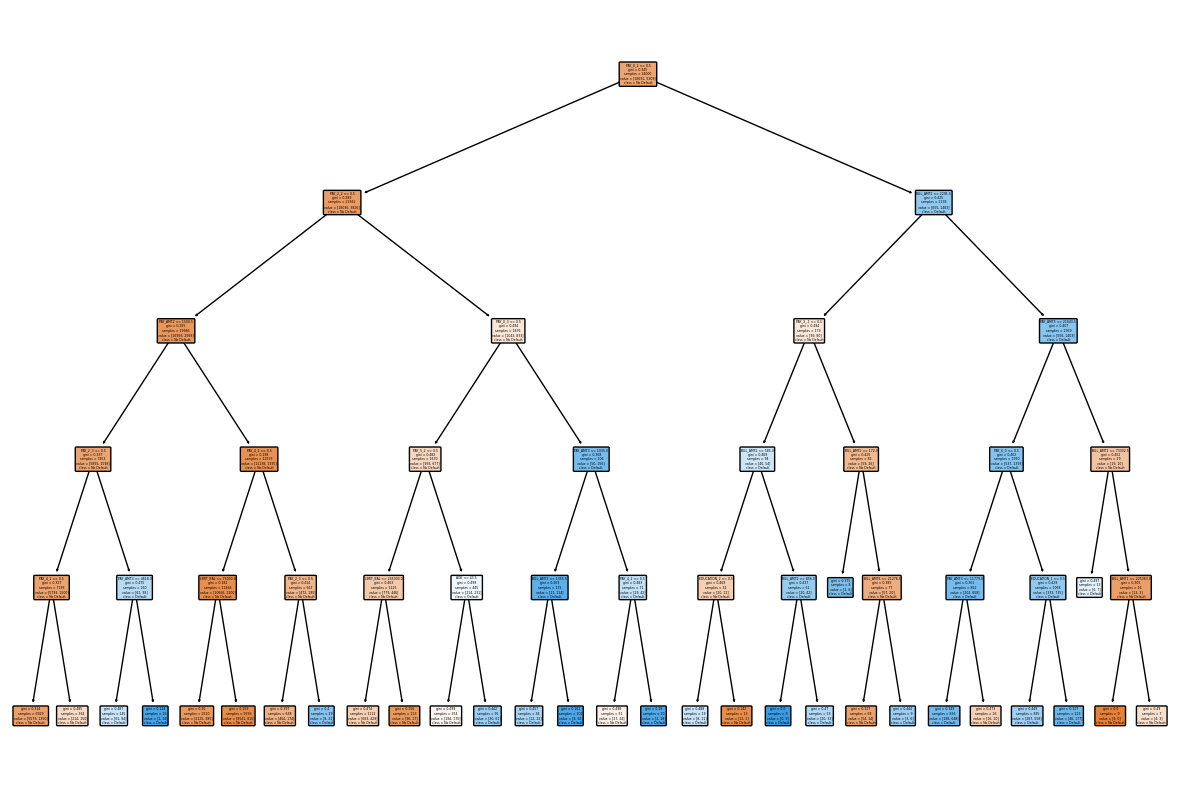

In [178]:
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=["No Default", "Default"], filled=True, rounded=True)
plt.show()